<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Confusion Matrix</h3>
</div>

<img src = "https://miro.medium.com/max/2000/1*MmnBnKKENiD1iW_83b0ZeQ.png" width=75%>

# Topics:

- [ ] What is a Confusion Matrix
- [ ] Confusion Matrix Metrics
- [ ] Displaying the Confusion Matrix using seaborn
- [ ] Confusion Matrix with Scikit-learn
- [ ] Multi-Class Confusion Matrix

## What is Confusion Matrix?

Confusion matrix represents the accuracy of the model in the tabular format by representing the count of correct/incorrect labels.

<img src = "https://miro.medium.com/max/1400/1*n2im9rDJdRQMBNZ3pPMKXw.png" width=80%>

* Positive (P): Observation is positive.
* Negative (N): Observation is not positive.
* True Positive (TP): Outcome where the model correctly predicts the positive class.
* True Negative (TN): Outcome where the model correctly predicts the negative class.
* False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
* False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.

<img src = "https://miro.medium.com/max/1738/1*prg8nKHYwm2NQBgP-sqS8g.jpeg" width=50%>

The total number of correct predictions for a class go into the expected row for that class value and the predicted column for that class value.

In the same way, the total number of incorrect predictions for a class go into the expected row for that class value and the predicted column for that class value.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabelled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

<img src = "https://miro.medium.com/max/1216/1*YV7zy1NGN1-HGQxY56nc_Q.png" width=75%>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Example of 2x2 Confusion Matrix

logistic regression would, in this synthetic dataset, classify values as either 0 or 1, i.e. class one or two, using the logistic curve.

<img src = "https://miro.medium.com/max/2000/1*TWXtKH_4trfKz7sexoadiw.png">

In [2]:
data = {'y_Actual':    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        'y_Predicted': [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
        }

In [3]:
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab( df['y_Predicted'],df['y_Actual'], rownames=['Predicted'], colnames=['Actual'])

In [4]:
df

,y_Actual,y_Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0
5,1,1
6,0,0
7,0,1
8,0,0
9,0,0


In [5]:
confusion_matrix

Actual,0,1
Predicted,,
0,7,1
1,2,2


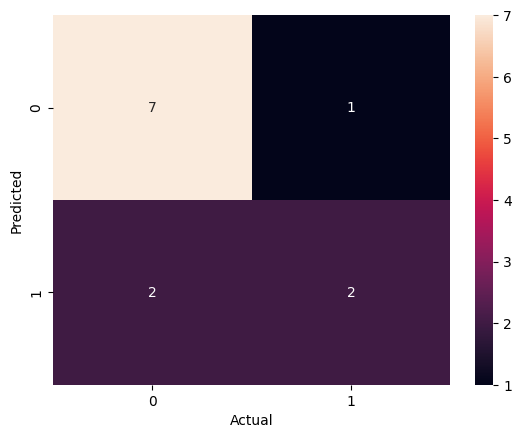

In [6]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [7]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(df["y_Actual"], df["y_Predicted"])

array([[7, 2],
       [1, 2]])

In [8]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df["y_Actual"], df["y_Predicted"])

0.75

In [9]:
# Recall
from sklearn.metrics import recall_score
recall_score(df["y_Actual"], df["y_Predicted"])

0.6666666666666666

In [10]:
# Precision
from sklearn.metrics import precision_score
precision_score(df["y_Actual"], df["y_Predicted"])

0.5

####  Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

Precision is important in music or video recommendation systems, e-commerce websites, etc. Wrong results could lead to customer churn and be harmful to the business.

####  Recall is a useful metric in cases where False Negative is a higher concern than False Positive.

Example : Covid-19

<img src = "https://miro.medium.com/max/1400/1*5_ZAlFhlCk8llhnYWD5PXw.png" width=40%>

In [11]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1_score(df["y_Actual"], df["y_Predicted"])

0.5714285714285715

In [12]:
# Method 2: Manual Calculation
recall = recall_score(df["y_Actual"], df["y_Predicted"])
precision = precision_score(df["y_Actual"], df["y_Predicted"])

F1 = 2 * (precision * recall) / (precision + recall)
F1

0.5714285714285715

In [13]:
# Method 3: Classification report
from sklearn.metrics import classification_report
print(classification_report(df["y_Actual"], df["y_Predicted"]))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.50      0.67      0.57         3

    accuracy                           0.75        12
   macro avg       0.69      0.72      0.70        12
weighted avg       0.78      0.75      0.76        12



# Confustion Matrix in a nutshell

<img src="https://i.stack.imgur.com/NzSnD.jpg" width=60% />

# Confusion Matrix for Multi-Class Classification

* TP = 7
* TN = (2+3+2+1) = 8
* FP = (8+9) = 17
* FN = (1+3) = 4

<img src="https://miro.medium.com/max/1000/1*yH2SM0DIUQlEiveK42NnBg.png" width=60% />

> Precision = 7/(7+17) = 0.29

> Recall = 7/(7+4) = 0.64

> F1-score = 0.40